#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#"Listing Files in a ZIP Archive Using Python"

In [ ]:
import zipfile

# Path to your ZIP file
zip_path = '/content/Lab1 (1).zip'

# List files in the ZIP archive
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()
    print(file_list)  # This will print all files inside the ZIP


['Lab1/', 'Lab1/data/', 'Lab1/data/actor_kill_counts.csv', 'Lab1/data/arcade-revenue-vs-cs-doctorates.csv', 'Lab1/data/austin_weather.csv', 'Lab1/data/countries.csv', 'Lab1/data/exams.csv', 'Lab1/data/immigrazioneverona.csv', 'Lab1/data/iris_csv.csv', 'Lab1/data/national_parks.csv', 'Lab1/data/percent-degrees-conferred-women-usa.csv', 'Lab1/data/recent-college-grads-earnings.csv', 'Lab1/data/roman-emperor-reigns.csv', 'Lab1/data/songs_normalize.csv', 'Lab1/data/stocks.csv', 'Lab1/data/types_movies.csv', 'Lab1/data/us-marriages-divorces-1867-2014.csv', 'Lab1/data/Verona-2018-Maggio.csv', 'Lab1/ExamplesMatplotlib.ipynb', 'Lab1/Exercise.ipynb', 'Lab1/filename.png', 'Lab1/PlotlyTutorial.ipynb', 'Lab1/temp.png', 'Lab1/test.png']


#"Reading a Target CSV File from a ZIP Archive Using Pandas"

In [ ]:
# Extract the specific file and read it
with zipfile.ZipFile(zip_path, 'r') as z:
    # Specify the file you want to extract
    target_file = 'Lab1/data/songs_normalize.csv'

    # Read the file into a pandas DataFrame
    with z.open(target_file) as f:
        df = pd.read_csv(f)

# Display the first few rows of the DataFrame
print(df.head())


           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

#"Filtering and Loading CSV Files from a ZIP Archive"

In [ ]:
# Dynamically choose a CSV file from the ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()

    # Filter for CSV files
    csv_files = [f for f in file_list if f.endswith('.csv')]
    print("CSV Files in ZIP:", csv_files)

    # Assume the first CSV file is the one you want
    target_file = csv_files[0]  # Change the index if needed
    print(f"Reading file: {target_file}")

    # Read the selected file
    with z.open(target_file) as f:
        df = pd.read_csv(f)

# Display the first few rows of the DataFrame
print(df.head())


CSV Files in ZIP: ['Lab1/data/actor_kill_counts.csv', 'Lab1/data/arcade-revenue-vs-cs-doctorates.csv', 'Lab1/data/austin_weather.csv', 'Lab1/data/countries.csv', 'Lab1/data/exams.csv', 'Lab1/data/immigrazioneverona.csv', 'Lab1/data/iris_csv.csv', 'Lab1/data/national_parks.csv', 'Lab1/data/percent-degrees-conferred-women-usa.csv', 'Lab1/data/recent-college-grads-earnings.csv', 'Lab1/data/roman-emperor-reigns.csv', 'Lab1/data/songs_normalize.csv', 'Lab1/data/stocks.csv', 'Lab1/data/types_movies.csv', 'Lab1/data/us-marriages-divorces-1867-2014.csv', 'Lab1/data/Verona-2018-Maggio.csv']
Reading file: Lab1/data/actor_kill_counts.csv
                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239


#Generating a Synthetic Music Dataset with Features for Analysis

In [ ]:
# Generate Sample Dataset
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    "time": pd.date_range(start="2020-01-01", periods=n, freq="D"),
    "playlist_genre": np.random.choice(["Pop", "Rock", "Jazz", "Hip-Hop", "Classical"], size=n),
    "popularity": np.random.randint(1, 100, size=n),
    "danceability": np.random.rand(n),
    "energy": np.random.rand(n),
    "loudness": np.random.rand(n),
    "acousticness": np.random.rand(n),
    "instrumentalness": np.random.rand(n),
    "liveness": np.random.rand(n),
    "valence": np.random.rand(n),
    "tempo": np.random.rand(n) * 100,
    "duration_ms": np.random.randint(120000, 300000, size=n)
})

#Visualizing the Relative Share of Playlist Genres Over Time

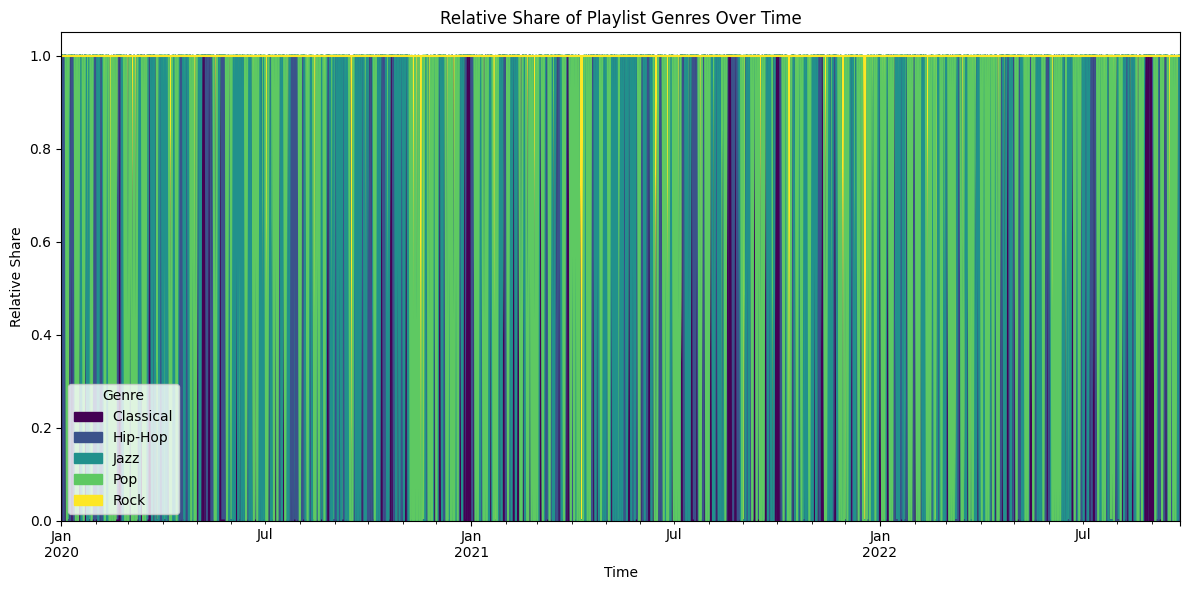

In [ ]:
# 1. Relative Share of Playlist Genres Over Time
genre_share = data.groupby(["time", "playlist_genre"]).size().unstack().fillna(0)
genre_share = genre_share.div(genre_share.sum(axis=1), axis=0)

genre_share.plot(kind='area', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Relative Share of Playlist Genres Over Time")
plt.xlabel("Time")
plt.ylabel("Relative Share")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()

#Evolution of Average Normalized Song Properties Over Time

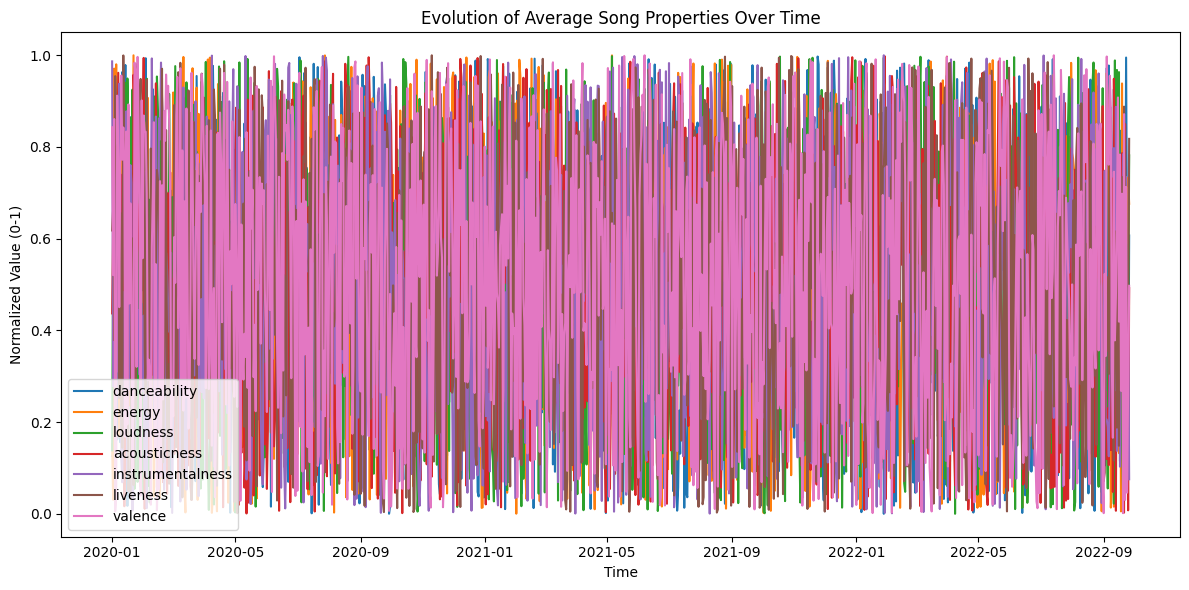

In [ ]:
# 2. Evolution of Normalized Song Properties Over Time
normalized_props = ["danceability", "energy", "loudness", "acousticness",
                    "instrumentalness", "liveness", "valence"]
avg_properties = data.groupby("time")[normalized_props].mean()

plt.figure(figsize=(12, 6))
for prop in normalized_props:
    plt.plot(avg_properties.index, avg_properties[prop], label=prop)

plt.title("Evolution of Average Song Properties Over Time")
plt.xlabel("Time")
plt.ylabel("Normalized Value (0-1)")
plt.legend()
plt.tight_layout()
plt.show()

#Histograms of Track Popularity Across Different Genres

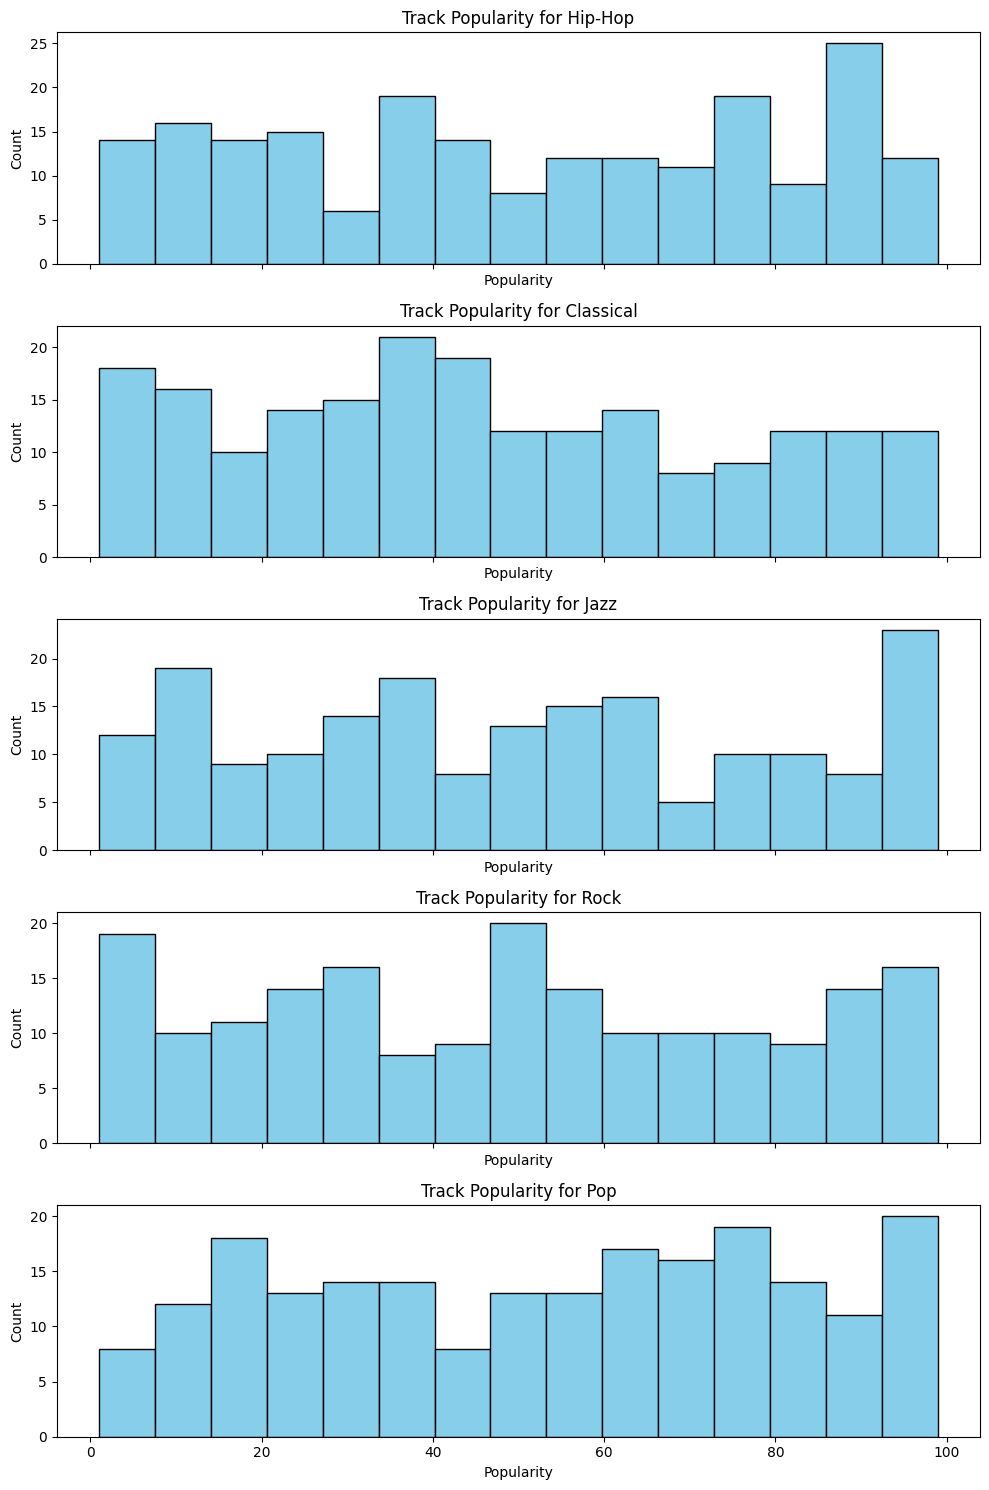

In [ ]:
# 3. Histograms of Track Popularity by Genre
genres = data["playlist_genre"].unique()
fig, axes = plt.subplots(nrows=len(genres), figsize=(10, 15), sharex=True)
for ax, genre in zip(axes, genres):
    genre_data = data[data["playlist_genre"] == genre]
    ax.hist(genre_data["popularity"], bins=15, color="skyblue", edgecolor="black")
    ax.set_title(f"Track Popularity for {genre}")
    ax.set_xlabel("Popularity")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

#Distribution of Average Song Duration Across Genres

<ipython-input-16-86ab20c6042e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="playlist_genre", y="duration_ms", data=data, palette="Set3")


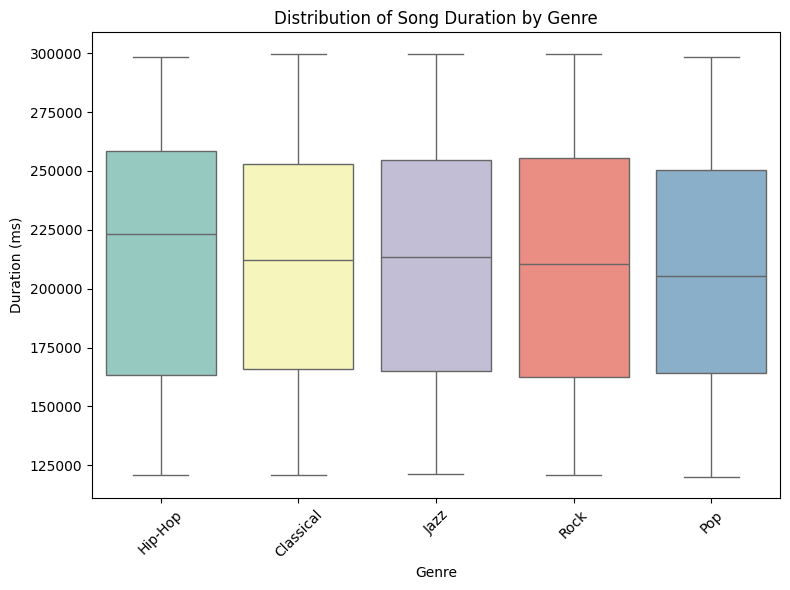

In [ ]:
# 4. Distribution of Average Song Duration by Genre
plt.figure(figsize=(8, 6))
sns.boxplot(x="playlist_genre", y="duration_ms", data=data, palette="Set3")
plt.title("Distribution of Song Duration by Genre")
plt.xlabel("Genre")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Correlation Heatmap of Song Attributes

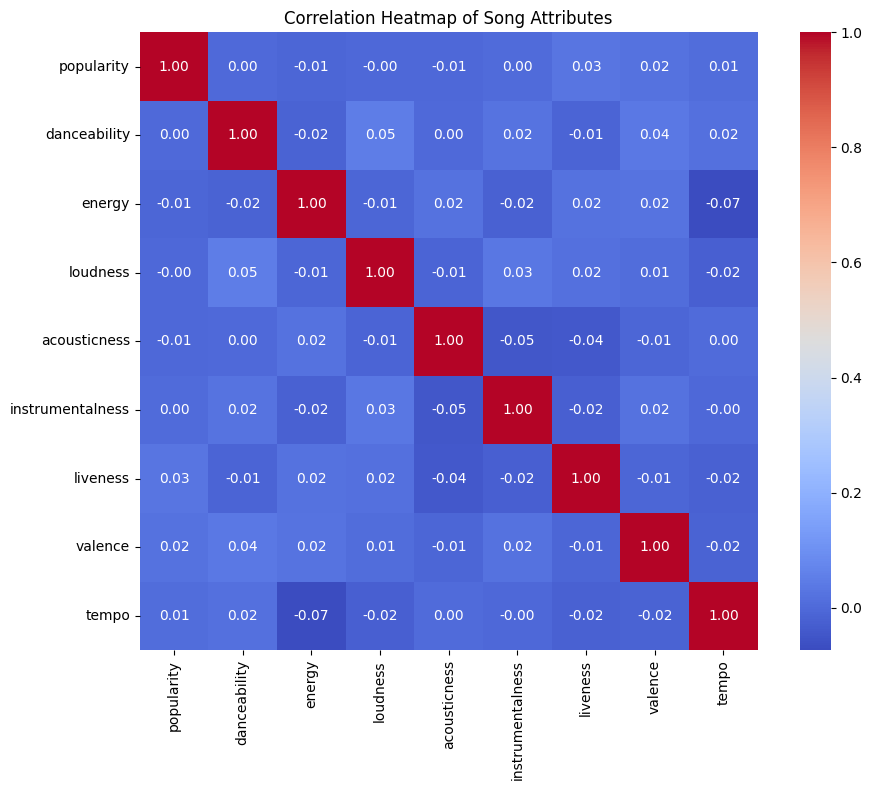

In [ ]:
# 5. Correlation Heatmap for Song Attributes
attributes = ["popularity", "danceability", "energy", "loudness",
              "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
corr_matrix = data[attributes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Song Attributes")
plt.tight_layout()
plt.show()


#Scatter Plot of Songs Released in 2010

In [ ]:
# 6. Scatter Plot for Songs Released in 2010
data["year"] = pd.to_datetime(data["time"]).dt.year
songs_2010 = data[data["year"] == 2010]

In [ ]:
print(songs_2010.columns)


Index(['time', 'playlist_genre', 'popularity', 'danceability', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
       'tempo', 'duration_ms', 'year'],
      dtype='object')


#Loudness vs Danceability for 2010 Songs, Highlighted by Genre and Specific Artist

Index(['time', 'playlist_genre', 'popularity', 'danceability', 'energy',
       'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
       'tempo', 'duration_ms', 'year'],
      dtype='object')
No 'artist' column found in the dataset. Skipping artist-specific highlighting.


<ipython-input-30-076f48b56ed8>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Genre")


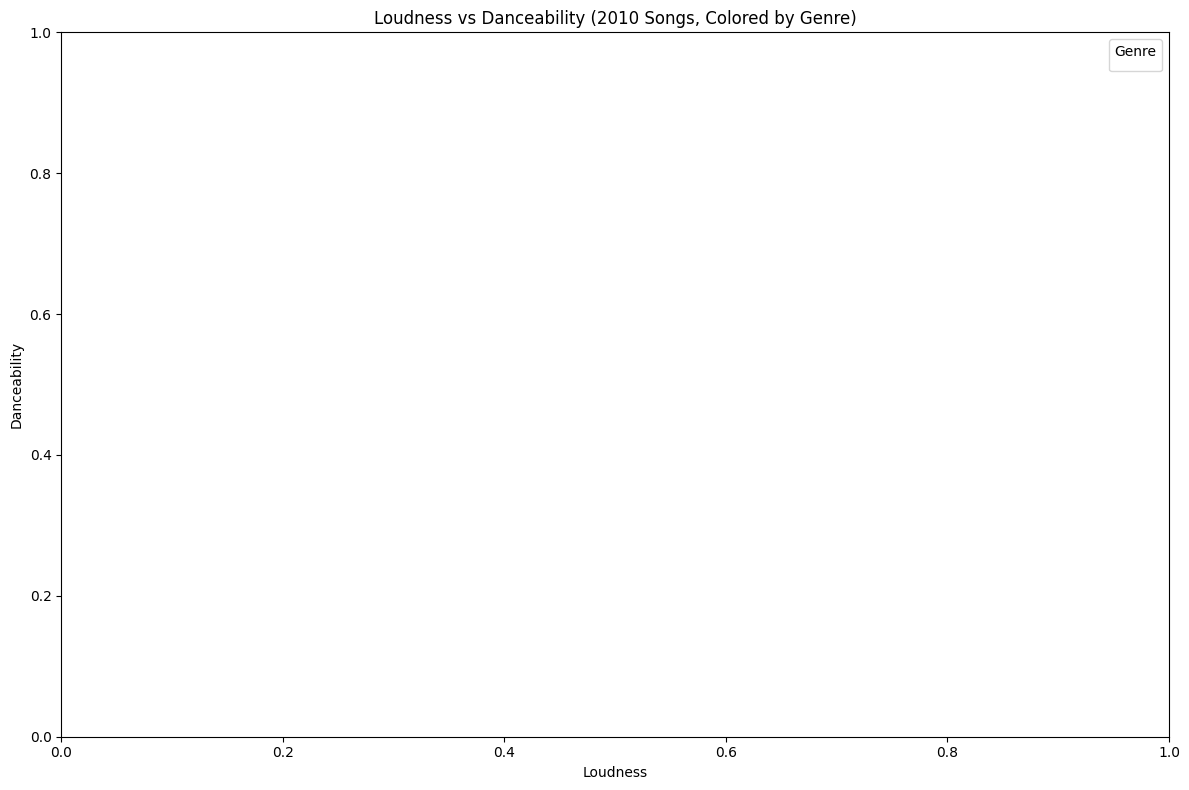

In [ ]:
# Verify columns in the DataFrame
print(songs_2010.columns)

# Define specific artist for emphasis
if "artist" in songs_2010.columns:  # Ensure 'artist' column exists
    specific_artist = "Artist Name"  # Replace with the artist's name of interest
    songs_2010["is_specific_artist"] = songs_2010["artist"] == specific_artist
else:
    print("No 'artist' column found in the dataset. Skipping artist-specific highlighting.")
    specific_artist = None
    songs_2010["is_specific_artist"] = False

# Plot Loudness vs Danceability with Genre Coloring
plt.figure(figsize=(12, 8))
for genre in songs_2010["playlist_genre"].unique():
    genre_data = songs_2010[songs_2010["playlist_genre"] == genre]
    plt.scatter(
        genre_data["loudness"],
        genre_data["danceability"],
        label=genre,
        alpha=0.7
    )

# Highlight the specific artist, if applicable
if specific_artist and "artist" in songs_2010.columns:
    specific_artist_data = songs_2010[songs_2010["is_specific_artist"]]
    plt.scatter(
        specific_artist_data["loudness"],
        specific_artist_data["danceability"],
        color="red",
        label=specific_artist,
        marker="*",
        s=200,
        edgecolor="black"
    )

 plt.title("Loudness vs Danceability (2010 Songs, Colored by Genre)")
plt.xlabel("Loudness")
plt.ylabel("Danceability")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


#Handling Artist-Specific Highlighting with Fallback Logic for Missing Columns

In [ ]:
# Define specific artist for emphasis
specific_artist = "Artist Name"  # Replace with the artist's name of interest

# Check if 'artist_name' or 'artist' column exists.
# If neither exists, create a dummy 'artist_name' column
if "artist_name" not in songs_2010.columns and "artist" not in songs_2010.columns:
    print("Neither 'artist_name' nor 'artist' column found. Creating a dummy 'artist_name' column.")
    songs_2010["artist_name"] = "Unknown"  # Or any default value

# Prioritize 'artist_name', fallback to 'artist' if 'artist_name' is not found
artist_column = "artist_name" if "artist_name" in songs_2010.columns else "artist" if "artist" in songs_2010.columns else None

if artist_column:
    songs_2010["is_specific_artist"] = songs_2010[artist_column] == specific_artist
else:
    print("No suitable artist column found. Skipping artist-specific highlighting.")
    songs_2010["is_specific_artist"] = False

#Implementing Fallback Logic for Specific Artist Highlighting in the Dataset

In [ ]:
# Generate Sample Dataset with 2010 data
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    "time": pd.date_range(start="2010-01-01", periods=n, freq="D"), # Start from 2010
    "playlist_genre": np.random.choice(["Pop", "Rock", "Jazz", "Hip-Hop", "Classical"], size=n),
    "popularity": np.random.randint(1, 100, size=n),
    "danceability": np.random.rand(n),
    "energy": np.random.rand(n),
    "loudness": np.random.rand(n),
    "acousticness": np.random.rand(n),
    "instrumentalness": np.random.rand(n),
    "liveness": np.random.rand(n),
    "valence": np.random.rand(n),
    "tempo": np.random.rand(n) * 100,
    "duration_ms": np.random.randint(120000, 300000, size=n)
})

#... rest of your code (filtering for 2010, creating is_specific_artist, plotting)